In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/enzo/Proyectos/Autos_usados/Data/autos_usados_v3_modelo.csv')

In [3]:
df.head()

,marca,year,color,combustible,puertas,transmision,motor,carroceria,km,price_in_pesos
0,bmw,2016,blanco,nafta,5,manual,1.6,hatchback,99800,5700000
1,bmw,2017,negro,nafta,2,automática,2.0,coupé,39200,9000000
2,toyota,2010,plateado,diésel,5,automática,4.5,suv,240000,8380000
3,audi,2017,azul petróleo,nafta,3,automática,2.0,hatchback,54000,9380000
4,volkswagen,2021,gris,diésel,4,automática,3.0,pick-up,29000,12200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   marca           1898 non-null   object 
 1   year            1898 non-null   int64  
 2   color           1898 non-null   object 
 3   combustible     1898 non-null   object 
 4   puertas         1898 non-null   int64  
 5   transmision     1898 non-null   object 
 6   motor           1898 non-null   float64
 7   carroceria      1898 non-null   object 
 8   km              1898 non-null   int64  
 9   price_in_pesos  1898 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 148.4+ KB


In [5]:
dummies = pd.get_dummies(df, columns=['marca', 'color', 'combustible', 'transmision', 'carroceria'], drop_first=True)

In [6]:
dummies

,year,puertas,motor,km,price_in_pesos,marca_audi,marca_bmw,marca_chery,marca_chevrolet,marca_chrysler,...,carroceria_coupé,carroceria_furgón,carroceria_hatchback,carroceria_light truck,carroceria_monovolumen,carroceria_off-road,carroceria_pick-up,carroceria_rural,carroceria_sedán,carroceria_suv
0,2016,5,1.6,99800,5700000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2017,2,2.0,39200,9000000,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2010,5,4.5,240000,8380000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017,3,2.0,54000,9380000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2021,4,3.0,29000,12200000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,2021,5,1.6,17000,3120000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1894,2016,5,1.8,89700,3350000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1895,2016,5,1.6,56000,3000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1896,2017,4,1.8,56000,3750000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


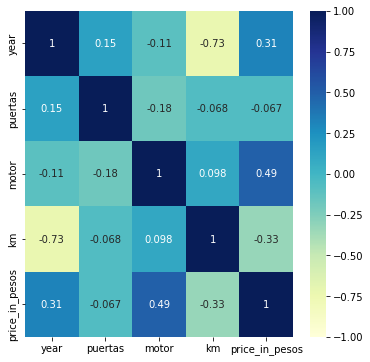

In [117]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0 ,cmap="YlGnBu", annot=True);

In [46]:
X = dummies.drop('price_in_pesos', axis=1)
y = dummies.price_in_pesos

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor 

In [158]:
sc = StandardScaler()

X = sc.fit_transform(X)

In [162]:
scores_lin = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores_lin.append(r2_score(y_test,y_pred))

In [163]:
np.argmax(scores_lin)

880

In [164]:
scores_lin[np.argmax(scores_lin)]

0.7243414412136222

In [173]:
scores_tree = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    scores_tree.append(r2_score(y_test,y_pred))

In [176]:
np.argmax(scores_tree)

257

In [177]:
scores_tree[np.argmax(scores_tree)]

0.895042751571327

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=257)

In [179]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

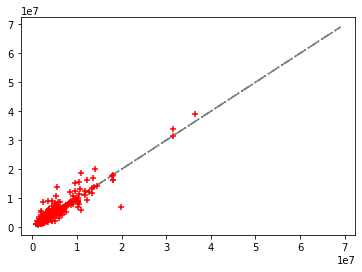

In [180]:
plt.plot(y,y, '-.',c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)

plt.show()